In [3]:
import pandas as pd
import numpy as np

In [4]:
data= pd.read_csv('data_324.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pd.set_option('display.max_columns', None)
data.head()

,isca,caid,Vin,Year,Make,Model,Trim,Mileage,Date,MIDMapAlgorithm,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Velocity,Salesefficiency,AvgDaysToSell,vol_tier,availability,inventory,spread_current,buyer_how_paid_cd,floorplan_cur_cust_nm,floorplan_cust_ovc_id,NGC_purchase_price,NGC_floored_amount,list_price,price,wholesale_price,MMR_price,revenue,cost,profitability,profit,NGC_total_floored,wallet_share,count_vin
0,1,CA11197380,1GTR2VE7XCZ218323,2012,GMC,Sierra 1500,Truck,NaN,2019-10-30,Exact,11750.0,16600.0,13051.0,116676.0,Warm,0.494258,15.0,Tier3,Medium,61.0,4850.0,NaN,NaN,NaN,NaN,NaN,NaN,16600.0,NaN,11750.0,48050.0,37900.0,0.267810,10150.0,0.0,0.0,3
1,1,CA11197380,2HGFB6E50DH705377,2013,Honda,Civic,Other,NaN,2019-10-12,Exact,10150.0,13900.0,7138.0,92944.0,Hot,0.685657,19.0,Tier2,Medium,140.0,3750.0,NaN,NaN,NaN,NaN,NaN,NaN,13900.0,NaN,10150.0,48050.0,37900.0,0.267810,10150.0,0.0,0.0,3
2,1,CA11197380,5NPE34AF5GH274704,2016,Hyundai,Sonata,Sedan,19310.0,2019-10-20,Exact,16000.0,17550.0,11112.0,44270.0,Cold,0.693079,21.0,Tier1,Low,502.0,1550.0,NaN,NaN,NaN,NaN,NaN,NaN,17550.0,NaN,16000.0,48050.0,37900.0,0.267810,10150.0,0.0,0.0,3
3,1,CA11197386,19XFA1F59AE046628,2010,Honda,Civic,LX,79889.0,2019-08-21,Exact,4225.0,7225.0,3671.0,127175.0,Hot,0.731679,12.0,Tier3,Low,51.0,3000.0,Check,NaN,NaN,NaN,NaN,NaN,7225.0,5700.0,5700.0,6464402.0,5903300.0,0.095049,561102.0,0.0,0.0,242
4,1,CA11197386,19XFB2F55DE031146,2013,Honda,Civic,LX,80827.0,2019-08-21,Exact,7075.0,9950.0,7138.0,92944.0,Hot,0.685657,19.0,Tier2,Medium,140.0,2875.0,Check,NaN,NaN,NaN,NaN,NaN,9950.0,7600.0,7600.0,6464402.0,5903300.0,0.095049,561102.0,0.0,0.0,242


In [ ]:
## change data to Dealer Vin level

In [14]:
df=data.drop_duplicates(['caid','no_caid','Vin'],keep= 'last')

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df.columns

Index(['isca', 'caid', 'no_caid', 'Source', 'Vin', 'Year', 'Make', 'Model',
       'Trim', 'Mileage', 'Date', 'MIDMapAlgorithm', 'MMR_adj_current',
       'RMI_adj_current', 'AvgPrice', 'avgmiles', 'Velocity',
       'Salesefficiency', 'AvgDaysToSell', 'vol_tier', 'availability',
       'inventory', 'spread_current', 'price', 'buyer_how_paid_cd',
       'floorplan_cur_cust_nm', 'floorplan_cust_ovc_id', 'NGC_purchase_price',
       'NGC_floored_amount', 'wholesale_price'],
      dtype='object')

In [15]:
df=df.loc[:,['caid', 'no_caid', 'Vin','AvgPrice','avgmiles','Velocity','Salesefficiency','AvgDaysToSell','vol_tier','availability','inventory']]

In [16]:
df.shape

(22769993, 11)

In [39]:
len(df.caid.unique())

62386

In [41]:
len(df.no_caid.unique())

47490

In [17]:
df.head()

,caid,no_caid,Vin,AvgPrice,avgmiles,Velocity,Salesefficiency,AvgDaysToSell,vol_tier,availability,inventory
0,CA11197380,NaN,1GTR2VE7XCZ218323,13051.0,116676.0,Warm,0.494258,15.0,Tier3,Medium,61.0
1,CA11197380,NaN,2HGFB6E50DH705377,7138.0,92944.0,Hot,0.685657,19.0,Tier2,Medium,140.0
2,CA11197380,NaN,5NPE34AF5GH274704,11112.0,44270.0,Cold,0.693079,21.0,Tier1,Low,502.0
3,CA11197386,NaN,19XFA1F59AE046628,3671.0,127175.0,Hot,0.731679,12.0,Tier3,Low,51.0
4,CA11197386,NaN,19XFB2F55DE031146,7138.0,92944.0,Hot,0.685657,19.0,Tier2,Medium,140.0


In [30]:
df.isna().sum()

caid                6540934
no_caid            16229059
Vin                      27
AvgPrice             917370
avgmiles             917370
Velocity            1366110
Salesefficiency      917971
AvgDaysToSell        917370
vol_tier             917370
availability         917376
inventory            969061
dtype: int64

In [36]:
df_clean=df.dropna(subset=['AvgPrice','avgmiles','Velocity','Salesefficiency','AvgDaysToSell','vol_tier','availability','inventory'], how='all')

In [37]:
df_clean.shape

(21852623, 11)

In [44]:
df_clean.isna().sum()

caid                6310390
no_caid            15542233
Vin                       0
AvgPrice                  0
avgmiles                  0
Velocity             448740
Salesefficiency         601
AvgDaysToSell             0
vol_tier                  0
availability              6
inventory             51691
dtype: int64

In [45]:
df_clean.Velocity.unique()

array(['Warm', 'Hot', 'Cold', nan], dtype=object)

In [51]:
df_clean.Salesefficiency.unique().min()

nan

In [52]:
df_clean.inventory.unique().min()

nan

In [53]:
df_clean=df_clean.dropna(subset=['Velocity','Salesefficiency','inventory'], thresh=1)

In [54]:
df_clean.isna().sum()

caid                6310234
no_caid            15541985
Vin                       0
AvgPrice                  0
avgmiles                  0
Velocity             448336
Salesefficiency         197
AvgDaysToSell             0
vol_tier                  0
availability              6
inventory             51287
dtype: int64

In [ ]:
## change data to dealer level

In [20]:
df.columns

Index(['caid', 'no_caid', 'Vin', 'AvgPrice', 'avgmiles', 'Velocity',
       'Salesefficiency', 'AvgDaysToSell', 'vol_tier', 'availability',
       'inventory'],
      dtype='object')

In [23]:
grouped.head()

,,AvgPrice_mean,AvgPrice_min,AvgPrice_max
caid,no_caid,,,


In [ ]:
## variable transformation

In [ ]:
#  model buiding variables:
total: profitibility
market share
*avg inventory 
*avgprice
*avgmiles
Popularity Tier count
Availability Tier count
Velocity Tier Count
Total Car have
Total Car sold in 3 months
*Avg Salesefficiency 
*AvgDaysToSell            
vol_tier count

In [42]:
data= pd.read_csv('data_324.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
data.head()

,isca,caid,Vin,Year,Make,Model,Trim,Mileage,Date,MIDMapAlgorithm,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Velocity,Salesefficiency,AvgDaysToSell,vol_tier,availability,inventory,spread_current,buyer_how_paid_cd,floorplan_cur_cust_nm,floorplan_cust_ovc_id,NGC_purchase_price,NGC_floored_amount,list_price,price,wholesale_price,MMR_price,revenue,cost,profitability,profit,NGC_total_floored,wallet_share,count_vin
0,1,CA11197380,1GTR2VE7XCZ218323,2012,GMC,Sierra 1500,Truck,NaN,2019-10-30,Exact,11750.0,16600.0,13051.0,116676.0,Warm,0.494258,15.0,Tier3,Medium,61.0,4850.0,NaN,NaN,NaN,NaN,NaN,NaN,16600.0,NaN,11750.0,48050.0,37900.0,0.267810,10150.0,0.0,0.0,3.0
1,1,CA11197380,2HGFB6E50DH705377,2013,Honda,Civic,Other,NaN,2019-10-12,Exact,10150.0,13900.0,7138.0,92944.0,Hot,0.685657,19.0,Tier2,Medium,140.0,3750.0,NaN,NaN,NaN,NaN,NaN,NaN,13900.0,NaN,10150.0,48050.0,37900.0,0.267810,10150.0,0.0,0.0,3.0
2,1,CA11197380,5NPE34AF5GH274704,2016,Hyundai,Sonata,Sedan,19310.0,2019-10-20,Exact,16000.0,17550.0,11112.0,44270.0,Cold,0.693079,21.0,Tier1,Low,502.0,1550.0,NaN,NaN,NaN,NaN,NaN,NaN,17550.0,NaN,16000.0,48050.0,37900.0,0.267810,10150.0,0.0,0.0,3.0
3,1,CA11197386,19XFA1F59AE046628,2010,Honda,Civic,LX,79889.0,2019-08-21,Exact,4225.0,7225.0,3671.0,127175.0,Hot,0.731679,12.0,Tier3,Low,51.0,3000.0,Check,NaN,NaN,NaN,NaN,NaN,7225.0,5700.0,5700.0,6464402.0,5903300.0,0.095049,561102.0,0.0,0.0,242.0
4,1,CA11197386,19XFB2F55DE031146,2013,Honda,Civic,LX,80827.0,2019-08-21,Exact,7075.0,9950.0,7138.0,92944.0,Hot,0.685657,19.0,Tier2,Medium,140.0,2875.0,Check,NaN,NaN,NaN,NaN,NaN,9950.0,7600.0,7600.0,6464402.0,5903300.0,0.095049,561102.0,0.0,0.0,242.0


In [44]:
data.columns

Index(['isca', 'caid', 'Vin', 'Year', 'Make', 'Model', 'Trim', 'Mileage',
       'Date', 'MIDMapAlgorithm', 'MMR_adj_current', 'RMI_adj_current',
       'AvgPrice', 'avgmiles', 'Velocity', 'Salesefficiency', 'AvgDaysToSell',
       'vol_tier', 'availability', 'inventory', 'spread_current',
       'buyer_how_paid_cd', 'floorplan_cur_cust_nm', 'floorplan_cust_ovc_id',
       'NGC_purchase_price', 'NGC_floored_amount', 'list_price', 'price',
       'wholesale_price', 'MMR_price', 'revenue', 'cost', 'profitability',
       'profit', 'NGC_total_floored', 'wallet_share', 'count_vin'],
      dtype='object')

In [45]:
data=data.loc[:,['isca','caid', 'Vin', 'Year', 'Make', 'Mileage','MMR_adj_current', 'RMI_adj_current','AvgPrice', 'avgmiles', 'Velocity', 'Salesefficiency', 'AvgDaysToSell',
       'vol_tier', 'availability', 'inventory', 'NGC_floored_amount', 'list_price','wholesale_price', 'MMR_price', 'revenue', 'cost', 'profitability','profit','NGC_total_floored','wallet_share','count_vin']]

In [46]:
data=pd.get_dummies(data=data, columns=['Velocity','vol_tier','availability'])

In [47]:
#data['price_gap'] = data['list_price']-data['RMI_adj_current']

In [48]:
data.columns

Index(['isca', 'caid', 'Vin', 'Year', 'Make', 'Mileage', 'MMR_adj_current',
       'RMI_adj_current', 'AvgPrice', 'avgmiles', 'Salesefficiency',
       'AvgDaysToSell', 'inventory', 'NGC_floored_amount', 'list_price',
       'wholesale_price', 'MMR_price', 'revenue', 'cost', 'profitability',
       'profit', 'NGC_total_floored', 'wallet_share', 'count_vin',
       'Velocity_Cold', 'Velocity_Hot', 'Velocity_Warm', 'vol_tier_Tier1',
       'vol_tier_Tier2', 'vol_tier_Tier3', 'vol_tier_Tier4', 'vol_tier_Tier5',
       'availability_Ex', 'availability_Excessive', 'availability_High',
       'availability_Low', 'availability_Medium', 'availability_No Inventory',
       'availability_Other'],
      dtype='object')

In [49]:
data['avg_year'] = data.groupby(['caid'])['Year'].transform(np.mean)
data['make_count'] = data.groupby(['caid'])['Make'].transform('nunique')
data['avg_milage'] = data.groupby(['caid'])['Mileage'].transform(np.mean)

In [50]:
data['avgmiles'] = data.groupby(['caid'])['avgmiles'].transform(np.mean)
data['AvgPrice'] = data.groupby(['caid'])['AvgPrice'].transform(np.mean)

In [51]:
data['Salesefficiency'] = data.groupby(['caid'])['Salesefficiency'].transform(np.mean)
data['AvgDaysToSell'] = data.groupby(['caid'])['AvgDaysToSell'].transform(np.mean)
data['inventory'] = data.groupby(['caid'])['inventory'].transform(np.mean)

In [52]:
data['MMR_adj_current'] = data.groupby(['caid'])['MMR_adj_current'].transform(np.mean)
data['RMI_adj_current'] = data.groupby(['caid'])['RMI_adj_current'].transform(np.mean)

In [53]:
data['list_price'] = data.groupby(['caid'])['list_price'].transform(np.mean)
data['MMR_price'] = data.groupby(['caid'])['MMR_price'].transform(np.mean)

In [54]:
data['wholesale_price'] = data.groupby(['caid'])['wholesale_price'].transform(np.mean)

In [55]:
data['NGC_floored_amount'] = data.groupby(['caid'])['NGC_floored_amount'].transform(np.mean)

In [56]:
data['revenue'] = data.groupby(['caid'])['revenue'].transform(np.mean)

In [57]:
data['cost'] = data.groupby(['caid'])['cost'].transform(np.mean)
data['profitability'] = data.groupby(['caid'])['profitability'].transform(np.mean)

In [58]:
data['profitability'] = data.groupby(['caid'])['profitability'].transform(np.mean)

In [59]:
#data['price_gap'] = data.groupby(['caid'])['price_gap'].transform(np.mean)

In [60]:
data['wallet_share'].shape

(20321809,)

In [61]:
data[data.wallet_share !=0].shape

(649911, 42)

In [62]:
#data['car_count'] = data.groupby(['caid'])['Vin'].transform('count')

In [63]:
## data['total_car'] = data.groupby(['caid'])['Vin'].count()

In [64]:
##category
data['Velocity_Cold'] = data.groupby(['caid'])['Velocity_Cold'].transform(np.sum)
data['Velocity_Hot'] = data.groupby(['caid'])['Velocity_Hot'].transform(np.sum)
data['Velocity_Warm'] = data.groupby(['caid'])['Velocity_Warm'].transform(np.sum)
data['vol_tier_Tier1'] = data.groupby(['caid'])['vol_tier_Tier1'].transform(np.sum)
data['vol_tier_Tier2'] = data.groupby(['caid'])['vol_tier_Tier2'].transform(np.sum)
data['vol_tier_Tier3'] = data.groupby(['caid'])['vol_tier_Tier3'].transform(np.sum)
data['vol_tier_Tier4'] = data.groupby(['caid'])['vol_tier_Tier4'].transform(np.sum)
data['vol_tier_Tier5'] = data.groupby(['caid'])['vol_tier_Tier5'].transform(np.sum)
data['availability_Excessive'] = data.groupby(['caid'])['availability_Excessive'].transform(np.sum)
data['availability_High'] = data.groupby(['caid'])['availability_High'].transform(np.sum)
data['availability_Low'] = data.groupby(['caid'])['availability_Low'].transform(np.sum)
data['availability_Medium'] = data.groupby(['caid'])['availability_Medium'].transform(np.sum)
data['availability_No Inventory'] = data.groupby(['caid'])['availability_No Inventory'].transform(np.sum)
data['availability_Other'] = data.groupby(['caid'])['availability_Other'].transform(np.sum)

In [65]:
data.head()

,isca,caid,Vin,Year,Make,Mileage,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,NGC_floored_amount,list_price,wholesale_price,MMR_price,revenue,cost,profitability,profit,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Ex,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,avg_milage
0,1,CA11197380,1GTR2VE7XCZ218323,2012,GMC,NaN,12633.333333,16016.666667,10433.666667,84630.000000,0.624331,18.333333,234.333333,NaN,NaN,NaN,12633.333333,48050.0,37900.0,0.267810,10150.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
1,1,CA11197380,2HGFB6E50DH705377,2013,Honda,NaN,12633.333333,16016.666667,10433.666667,84630.000000,0.624331,18.333333,234.333333,NaN,NaN,NaN,12633.333333,48050.0,37900.0,0.267810,10150.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
2,1,CA11197380,5NPE34AF5GH274704,2016,Hyundai,19310.0,12633.333333,16016.666667,10433.666667,84630.000000,0.624331,18.333333,234.333333,NaN,NaN,NaN,12633.333333,48050.0,37900.0,0.267810,10150.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
3,1,CA11197386,19XFA1F59AE046628,2010,Honda,79889.0,26992.723005,31022.123894,29009.302128,33553.957447,0.503281,18.408511,282.646809,NaN,NaN,14410.759494,27845.754717,6464402.0,5903300.0,0.095049,561102.0,0.0,0.0,242.0,49.0,95.0,91.0,30.0,37.0,43.0,99.0,26.0,0,105.0,43.0,13.0,57.0,0.0,17.0,2017.619835,15,24672.820084
4,1,CA11197386,19XFB2F55DE031146,2013,Honda,80827.0,26992.723005,31022.123894,29009.302128,33553.957447,0.503281,18.408511,282.646809,NaN,NaN,14410.759494,27845.754717,6464402.0,5903300.0,0.095049,561102.0,0.0,0.0,242.0,49.0,95.0,91.0,30.0,37.0,43.0,99.0,26.0,0,105.0,43.0,13.0,57.0,0.0,17.0,2017.619835,15,24672.820084


In [66]:
data=data.drop_duplicates(['caid'],keep= 'last')

In [67]:
data.head()

,isca,caid,Vin,Year,Make,Mileage,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,NGC_floored_amount,list_price,wholesale_price,MMR_price,revenue,cost,profitability,profit,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Ex,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,avg_milage
2,1,CA11197380,5NPE34AF5GH274704,2016,Hyundai,19310.0,12633.333333,16016.666667,10433.666667,84630.000000,0.624331,18.333333,234.333333,NaN,NaN,NaN,12633.333333,4.805000e+04,3.790000e+04,0.267810,1.015000e+04,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
244,1,CA11197386,ZACCJBCT4FPB27624,2015,Jeep,NaN,26992.723005,31022.123894,29009.302128,33553.957447,0.503281,18.408511,282.646809,NaN,NaN,14410.759494,27845.754717,6.464402e+06,5.903300e+06,0.095049,5.611020e+05,0.0,0.0,242.0,49.0,95.0,91.0,30.0,37.0,43.0,99.0,26.0,0,105.0,43.0,13.0,57.0,0.0,17.0,2017.619835,15,24672.820084
575,1,CA11197387,WP1AG2A52HLB50755,2017,Porsche,23265.0,45102.591991,57539.038340,56054.082781,26070.062914,0.647884,21.076159,42.979933,NaN,56893.270739,67875.000000,45498.932092,9.735923e+06,8.462801e+06,0.150437,1.273122e+06,0.0,0.0,331.0,19.0,220.0,53.0,9.0,6.0,59.0,91.0,137.0,0,5.0,108.0,43.0,136.0,3.0,7.0,2016.752266,21,21148.860669
646,1,CA11197388,YV1SW592X61534208,2006,Volvo,171647.0,3498.550725,6719.339623,4206.478873,128543.450704,0.595144,13.915493,101.171429,NaN,0.000000,NaN,3498.550725,3.561250e+05,2.414000e+05,0.475249,1.147250e+05,0.0,0.0,71.0,3.0,35.0,32.0,11.0,6.0,25.0,12.0,17.0,0,0.0,4.0,17.0,49.0,1.0,0.0,2008.422535,25,133246.704225
648,1,CA11197391,4T1B11HK4JU069300,2018,Toyota,39616.0,8850.000000,19400.000000,9144.500000,88761.500000,0.594674,13.500000,199.000000,NaN,NaN,9300.000000,18000.000000,1.940000e+04,1.800000e+04,0.077778,1.400000e+03,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,1.0,0.0,0.0,2011.500000,2,101540.000000


In [68]:
data['profitability'] = data['profit'] / data['revenue']

In [69]:
data = data.drop(['caid','Vin','Year','Make','Mileage','list_price','wholesale_price','cost','profit','NGC_floored_amount','MMR_price'],axis=1)

In [70]:
data.head()

,isca,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Ex,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,avg_milage
2,1,12633.333333,16016.666667,10433.666667,84630.000000,0.624331,18.333333,234.333333,4.805000e+04,0.211238,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
244,1,26992.723005,31022.123894,29009.302128,33553.957447,0.503281,18.408511,282.646809,6.464402e+06,0.086799,0.0,0.0,242.0,49.0,95.0,91.0,30.0,37.0,43.0,99.0,26.0,0,105.0,43.0,13.0,57.0,0.0,17.0,2017.619835,15,24672.820084
575,1,45102.591991,57539.038340,56054.082781,26070.062914,0.647884,21.076159,42.979933,9.735923e+06,0.130765,0.0,0.0,331.0,19.0,220.0,53.0,9.0,6.0,59.0,91.0,137.0,0,5.0,108.0,43.0,136.0,3.0,7.0,2016.752266,21,21148.860669
646,1,3498.550725,6719.339623,4206.478873,128543.450704,0.595144,13.915493,101.171429,3.561250e+05,0.322148,0.0,0.0,71.0,3.0,35.0,32.0,11.0,6.0,25.0,12.0,17.0,0,0.0,4.0,17.0,49.0,1.0,0.0,2008.422535,25,133246.704225
648,1,8850.000000,19400.000000,9144.500000,88761.500000,0.594674,13.500000,199.000000,1.940000e+04,0.072165,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,1.0,0.0,0.0,2011.500000,2,101540.000000


In [76]:
data['Wholesale_dif'] = (data['MMR_adj_current'] - data['AvgPrice']) / data['AvgPrice']
data['Retail_dif'] = (data['RMI_adj_current'] - data['AvgPrice']) / data['AvgPrice']
data['Avg_mileage_dif'] = (data['avg_milage'] - data['avgmiles']) / data['avgmiles']
data['Velocity_Cold'] = data['Velocity_Cold'] / data['count_vin']
data['Velocity_Hot'] = data['Velocity_Hot'] / data['count_vin']
data['Velocity_Warm'] = data['Velocity_Warm'] / data['count_vin']
data['vol_tier_Tier1'] = data['vol_tier_Tier1'] / data['count_vin']
data['vol_tier_Tier2'] = data['vol_tier_Tier2'] / data['count_vin']
data['vol_tier_Tier3'] = data['vol_tier_Tier3'] / data['count_vin']
data['vol_tier_Tier4'] = data['vol_tier_Tier4'] / data['count_vin']
data['vol_tier_Tier5'] = data['vol_tier_Tier5'] / data['count_vin']
data['availability_Excessive'] = data['availability_Excessive'] / data['count_vin']
data['availability_High'] = data['availability_High'] / data['count_vin']
data['availability_Low'] = data['availability_Low'] / data['count_vin']
data['availability_Medium'] = data['availability_Medium'] / data['count_vin']
data['availability_No Inventory'] = data['availability_No Inventory'] / data['count_vin']
data['availability_Other'] = data['availability_Other'] / data['count_vin']
data['avg_year'] = data['avg_year'] - 1933

In [78]:
data = data.drop(['MMR_adj_current','RMI_adj_current','availability_Ex','avg_milage'],axis=1)

In [79]:
data.head()

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
2,1,10433.666667,84630.000000,0.624331,18.333333,234.333333,4.805000e+04,0.211238,0.0,0.0,3.0,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.222222,0.000000,0.000000,80.666667,3,0.210824,0.535095,-0.771830
244,1,29009.302128,33553.957447,0.503281,18.408511,282.646809,6.464402e+06,0.086799,0.0,0.0,242.0,0.000837,0.001622,0.001554,0.000512,0.000632,0.000734,0.001690,0.000444,0.001793,0.000734,0.000222,0.000973,0.000000,0.070248,84.619835,15,-0.069515,0.069385,-0.264682
575,1,56054.082781,26070.062914,0.647884,21.076159,42.979933,9.735923e+06,0.130765,0.0,0.0,331.0,0.000173,0.002008,0.000484,0.000082,0.000055,0.000539,0.000831,0.001250,0.000046,0.000986,0.000392,0.001241,0.009063,0.021148,83.752266,21,-0.195374,0.026491,-0.188768
646,1,4206.478873,128543.450704,0.595144,13.915493,101.171429,3.561250e+05,0.322148,0.0,0.0,71.0,0.000595,0.006943,0.006348,0.002182,0.001190,0.004959,0.002380,0.003372,0.000000,0.000793,0.003372,0.009720,0.014085,0.000000,75.422535,25,-0.168295,0.597379,0.036589
648,1,9144.500000,88761.500000,0.594674,13.500000,199.000000,1.940000e+04,0.072165,0.0,0.0,2.0,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,78.500000,2,-0.032205,1.121494,0.143964


In [80]:
data.describe()

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
count,95495.000000,94588.000000,94588.000000,94588.000000,94588.000000,94485.000000,9.549500e+04,9.252800e+04,9.549400e+04,92528.000000,95494.000000,95494.000000,95494.000000,95494.000000,95494.000000,95494.000000,95494.000000,95494.000000,95494.000000,95494.000000,95494.000000,95494.000000,95494.000000,95494.000000,95494.000000,95495.000000,95495.000000,93752.000000,92292.000000,91658.000000
mean,0.653280,16585.079896,73138.415561,0.562213,19.645654,266.303678,4.240551e+06,-inf,1.756648e+04,0.062256,211.867761,0.037563,0.084805,0.064508,0.044212,0.033702,0.046287,0.027024,0.038006,0.013175,0.033871,0.039494,0.099269,0.005323,0.035559,80.627856,10.412221,-0.070063,0.294726,-0.155264
std,0.475928,13164.234096,47809.350085,0.083056,11.060400,270.184553,1.975710e+07,NaN,3.191653e+05,0.299023,801.981267,0.152765,0.219502,0.193196,0.164682,0.141465,0.164409,0.127561,0.153088,0.089786,0.146380,0.154518,0.235758,0.040869,0.088936,4.656425,10.355506,0.173854,0.330989,0.522573
min,0.000000,267.000000,47.000000,0.000000,1.000000,1.000000,0.000000e+00,-inf,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.984648,-0.909375,-1.000000
25%,0.000000,6834.065789,31423.169050,0.514587,14.750000,79.285714,4.340000e+04,1.245216e-01,0.000000e+00,0.000000,4.000000,0.000000,0.000566,0.000396,0.000000,0.000000,0.000163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000320,0.000000,0.000000,77.272727,2.000000,-0.141260,0.118236,-0.325164
50%,1.000000,15376.480933,62763.608599,0.570977,17.753739,192.000000,2.706240e+05,1.676372e-01,0.000000e+00,0.000000,23.000000,0.001183,0.006764,0.004630,0.001041,0.000916,0.001975,0.000375,0.000810,0.000000,0.000758,0.000494,0.008074,0.000000,0.000000,81.893617,6.000000,-0.053294,0.198220,-0.123960
75%,1.000000,22941.454545,116491.650000,0.615479,20.500000,363.688623,2.923390e+06,3.148148e-01,0.000000e+00,0.000000,151.000000,0.007693,0.044444,0.027682,0.010000,0.008264,0.015306,0.005190,0.007812,0.000682,0.005831,0.009452,0.061728,0.000000,0.017123,84.419550,17.000000,0.009883,0.374037,0.055310
max,1.000000,273038.000000,995626.000000,1.000000,283.000000,5798.000000,3.659327e+09,9.999436e-01,7.988542e+07,17.959643,70782.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,63.000000,6.492795,7.107905,75.163754


In [81]:
data.isna().sum()

isca                            0
AvgPrice                      907
avgmiles                      907
Salesefficiency               907
AvgDaysToSell                 907
inventory                    1010
revenue                         0
profitability                2967
NGC_total_floored               1
wallet_share                 2967
count_vin                       1
Velocity_Cold                   1
Velocity_Hot                    1
Velocity_Warm                   1
vol_tier_Tier1                  1
vol_tier_Tier2                  1
vol_tier_Tier3                  1
vol_tier_Tier4                  1
vol_tier_Tier5                  1
availability_Excessive          1
availability_High               1
availability_Low                1
availability_Medium             1
availability_No Inventory       1
availability_Other              1
avg_year                        0
make_count                      0
Wholesale_dif                1743
Retail_dif                   3203
Avg_mileage_di

In [86]:
data = data[data.count_vin.notnull()]

In [87]:
data.shape

(95494, 30)

In [88]:
data.to_csv('0325dealer_data.csv',index=False)

In [44]:
#df=data.drop(['NGC_floored_amount','list_price','wholesale_price','price_gap'], axis=1)

In [45]:
df.isna().sum()

isca                            0
caid                            0
Vin                             0
MMR_adj_current              2305
RMI_adj_current              4029
AvgPrice                     1167
avgmiles                     1167
Salesefficiency              1167
AvgDaysToSell                1167
inventory                    1290
MMR_price                    3942
revenue                         0
cost                            0
profitability                3942
Velocity_Cold                   0
Velocity_Hot                    0
Velocity_Warm                   0
vol_tier_Tier1                  0
vol_tier_Tier2                  0
vol_tier_Tier3                  0
vol_tier_Tier4                  0
vol_tier_Tier5                  0
availability_Excessive          0
availability_High               0
availability_Low                0
availability_Medium             0
availability_No Inventory       0
availability_Other              0
car_count                       0
dtype: int64

In [47]:
df.shape

(105439, 29)

In [48]:
#K-means code

In [89]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [90]:
df = data

In [91]:
df.columns

Index(['isca', 'AvgPrice', 'avgmiles', 'Salesefficiency', 'AvgDaysToSell',
       'inventory', 'revenue', 'profitability', 'NGC_total_floored',
       'wallet_share', 'count_vin', 'Velocity_Cold', 'Velocity_Hot',
       'Velocity_Warm', 'vol_tier_Tier1', 'vol_tier_Tier2', 'vol_tier_Tier3',
       'vol_tier_Tier4', 'vol_tier_Tier5', 'availability_Excessive',
       'availability_High', 'availability_Low', 'availability_Medium',
       'availability_No Inventory', 'availability_Other', 'avg_year',
       'make_count', 'Wholesale_dif', 'Retail_dif', 'Avg_mileage_dif'],
      dtype='object')

In [96]:
df=df.dropna()

In [51]:
#X=df.drop(['caid','Vin'], axis=1)

In [52]:
#X=df.loc[:,['MMR_adj_current', 'RMI_adj_current', 'AvgPrice',
       'avgmiles', 'Salesefficiency', 'AvgDaysToSell', 'inventory',
       'MMR_price', 'revenue', 'cost', 'profitability', 'Velocity_Cold',
       'Velocity_Hot', 'Velocity_Warm', 'vol_tier_Tier1', 'vol_tier_Tier2',
       'vol_tier_Tier3', 'vol_tier_Tier4', 'vol_tier_Tier5',
       'availability_Excessive', 'availability_High', 'availability_Low',
       'availability_Medium', 'availability_No Inventory',
       'availability_Other', 'car_count']]

In [97]:
X=df

In [98]:
X.head()

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
2,1,10433.666667,84630.000000,0.624331,18.333333,234.333333,4.805000e+04,0.211238,0.0,0.0,3.0,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.222222,0.000000,0.000000,80.666667,3,0.210824,0.535095,-0.771830
244,1,29009.302128,33553.957447,0.503281,18.408511,282.646809,6.464402e+06,0.086799,0.0,0.0,242.0,0.000837,0.001622,0.001554,0.000512,0.000632,0.000734,0.001690,0.000444,0.001793,0.000734,0.000222,0.000973,0.000000,0.070248,84.619835,15,-0.069515,0.069385,-0.264682
575,1,56054.082781,26070.062914,0.647884,21.076159,42.979933,9.735923e+06,0.130765,0.0,0.0,331.0,0.000173,0.002008,0.000484,0.000082,0.000055,0.000539,0.000831,0.001250,0.000046,0.000986,0.000392,0.001241,0.009063,0.021148,83.752266,21,-0.195374,0.026491,-0.188768
646,1,4206.478873,128543.450704,0.595144,13.915493,101.171429,3.561250e+05,0.322148,0.0,0.0,71.0,0.000595,0.006943,0.006348,0.002182,0.001190,0.004959,0.002380,0.003372,0.000000,0.000793,0.003372,0.009720,0.014085,0.000000,75.422535,25,-0.168295,0.597379,0.036589
648,1,9144.500000,88761.500000,0.594674,13.500000,199.000000,1.940000e+04,0.072165,0.0,0.0,2.0,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,78.500000,2,-0.032205,1.121494,0.143964


In [99]:
#define X and Y
x = X.values

In [100]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
x = mm_scaler.fit_transform(X)
mm_scaler.transform(x)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[ 1.00000000e+00, -2.65619719e-03, -3.71888463e-04, ...,
         2.12114883e-01,  1.35899546e-01,  1.31689384e-02],
       [ 1.00000000e+00, -2.65584144e-03, -3.72048780e-04, ...,
         2.02975543e-01,  1.28654172e-01,  1.32563639e-02],
       [ 1.00000000e+00, -2.65532349e-03, -3.72072270e-04, ...,
         1.98872417e-01,  1.27986841e-01,  1.32694504e-02],
       ...,
       [ 0.00000000e+00, -2.65590069e-03, -3.72034715e-04, ...,
         2.03277054e-01,  1.29769776e-01,  1.33628460e-02],
       [ 0.00000000e+00, -2.65584368e-03, -3.72091896e-04, ...,
         2.01310455e-01,  1.27699626e-01,  1.35435807e-02],
       [ 0.00000000e+00, -2.65598331e-03, -3.71984609e-04, ...,
         2.03710714e-01,  1.30719568e-01,  1.32803738e-02]])

1
2
3
4
5
6
7
8
9
10


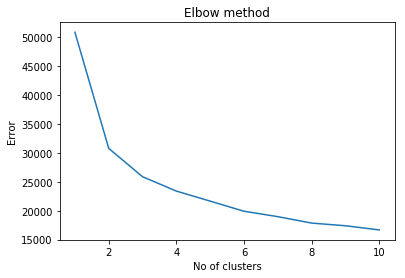

In [102]:
Error =[]
for i in range(1, 11):
    print(i)
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [107]:
from sklearn.metrics import silhouette_score
Silhouette = []
for i in range(2,10):
    print(i)
    clusterer = KMeans(n_clusters = i)
    cluster_labels = clusterer.fit_predict(x)
    sil = silhouette_score(x, cluster_labels)
    Silhouette.append(sil)

2
3
4
5
6
7
8
9


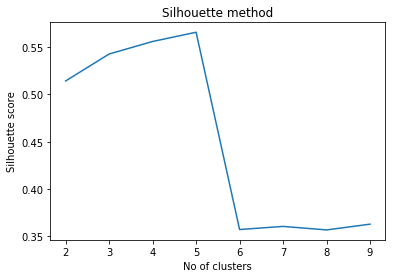

In [108]:
plt.plot(range(2, 10), Silhouette)
plt.title('Silhouette method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [109]:
kmeansk = KMeans(n_clusters=5)
y_kmeansk = kmeansk.fit_predict(x)
print(y_kmeansk)

kmeansk.cluster_centers_

[2 1 1 ... 3 3 3]


array([[ 6.41254393e-01,  5.12080543e-02,  1.66904125e-01,
         6.77405613e-01,  5.95215498e-02,  3.52065184e-02,
         9.86321888e-06,  9.53194486e-01,  7.64256150e-06,
         2.92024782e-03, -2.51534904e-16,  3.81639165e-16,
         1.00000000e+00, -2.19269047e-15,  2.25736686e-01,
         2.12489862e-01,  2.98729386e-01,  1.34630981e-01,
         1.28413085e-01,  2.35198702e-02,  1.37334415e-01,
         2.18978102e-01,  6.18815896e-01,  4.00721123e-16,
         1.35171668e-03,  8.33771402e-01,  3.69149156e-15,
         1.64068501e-01,  1.60783751e-01,  1.25864224e-02],
       [ 1.00000000e+00,  8.30563280e-02,  9.76118348e-02,
         5.89026216e-01,  7.03029715e-02,  5.27641334e-02,
         9.11396360e-03,  9.47501397e-01,  6.40887177e-04,
         1.46233637e-03,  9.68807217e-03,  9.37685521e-04,
         1.96584981e-03,  1.48557470e-03,  1.12813674e-03,
         7.97888826e-04,  1.03431288e-03,  6.05673051e-04,
         8.79675453e-04,  3.89260716e-04,  8.26168108e-

In [110]:
np.around(kmeansk.cluster_centers_, decimals=1)

array([[ 0.6,  0.1,  0.2,  0.7,  0.1,  0. ,  0. ,  1. ,  0. ,  0. , -0. ,
         0. ,  1. , -0. ,  0.2,  0.2,  0.3,  0.1,  0.1,  0. ,  0.1,  0.2,
         0.6,  0. ,  0. ,  0.8,  0. ,  0.2,  0.2,  0. ],
       [ 1. ,  0.1,  0.1,  0.6,  0.1,  0.1,  0. ,  0.9,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0.1,  0.9,  0.4,  0.2,  0.1,  0. ],
       [ 1. ,  0.1,  0.2,  0.6,  0.1,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
         0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0.1,  0. ,  0. ,  0.8,  0.1,  0.2,  0.2,  0. ],
       [-0. ,  0.1,  0.1,  0.6,  0.1,  0.1,  0. ,  0.9, -0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0.1,  0. ,  0. ,  0.9,  0.1,  0.2,  0.2,  0. ],
       [ 0.6,  0.1,  0.1,  0.6,  0.1,  0. ,  0. ,  1. ,  0. ,  0. , -0. ,
         0. , -0. ,  1. ,  0.3,  0.2,  0.2,  0.2,  0.1,  0.1,  0.2,  0.2,
         0.6,  0. ,  0. ,  0.9, 

In [111]:
import collections, numpy
collections.Counter(y_kmeansk)

Counter({2: 33694, 1: 21633, 0: 3699, 4: 2436, 3: 27897})

In [63]:
pd.set_option('display.max_columns', None)
data.head()

,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,MMR_price,revenue,cost,profitability,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,car_count
2,12633.333333,16016.666667,10433.666667,84630.000000,0.624331,18.333333,234.333333,12633.333333,4.805000e+04,3.790000e+04,0.267810,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3
244,26992.723005,31022.123894,29009.302128,33553.957447,0.503281,18.408511,282.646809,27845.754717,6.464402e+06,5.903300e+06,0.095049,49.0,95.0,91.0,30.0,37.0,43.0,99.0,26.0,105.0,43.0,13.0,57.0,0.0,17.0,242
575,45102.591991,57539.038340,56054.082781,26070.062914,0.647884,21.076159,42.979933,45498.932092,9.735923e+06,8.462801e+06,0.150437,19.0,220.0,53.0,9.0,6.0,59.0,91.0,137.0,5.0,108.0,43.0,136.0,3.0,7.0,331
646,3498.550725,6719.339623,4206.478873,128543.450704,0.595144,13.915493,101.171429,3498.550725,3.561250e+05,2.414000e+05,0.475249,3.0,35.0,32.0,11.0,6.0,25.0,12.0,17.0,0.0,4.0,17.0,49.0,1.0,0.0,71
648,8850.000000,19400.000000,9144.500000,88761.500000,0.594674,13.500000,199.000000,18000.000000,1.940000e+04,1.800000e+04,0.077778,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2


In [118]:
result = pd.DataFrame(np.around(kmeansk.cluster_centers_,decimals=3))

In [116]:
X.columns

Index(['isca', 'AvgPrice', 'avgmiles', 'Salesefficiency', 'AvgDaysToSell',
       'inventory', 'revenue', 'profitability', 'NGC_total_floored',
       'wallet_share', 'count_vin', 'Velocity_Cold', 'Velocity_Hot',
       'Velocity_Warm', 'vol_tier_Tier1', 'vol_tier_Tier2', 'vol_tier_Tier3',
       'vol_tier_Tier4', 'vol_tier_Tier5', 'availability_Excessive',
       'availability_High', 'availability_Low', 'availability_Medium',
       'availability_No Inventory', 'availability_Other', 'avg_year',
       'make_count', 'Wholesale_dif', 'Retail_dif', 'Avg_mileage_dif'],
      dtype='object')

In [119]:
result.columns = X.columns

In [120]:
result

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
0,0.641,0.051,0.167,0.677,0.060,0.035,0.000,0.953,0.000,0.003,-0.000,0.000,1.000,-0.000,0.226,0.212,0.299,0.135,0.128,0.024,0.137,0.219,0.619,0.000,0.001,0.834,0.000,0.164,0.161,0.013
1,1.000,0.083,0.098,0.589,0.070,0.053,0.009,0.948,0.001,0.001,0.010,0.001,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.000,0.001,0.001,0.002,0.004,0.077,0.902,0.390,0.163,0.139,0.011
2,1.000,0.056,0.155,0.611,0.062,0.040,0.001,0.954,0.000,0.008,0.001,0.052,0.068,0.046,0.043,0.033,0.043,0.023,0.026,0.009,0.025,0.041,0.091,0.007,0.018,0.838,0.074,0.154,0.156,0.012
3,-0.000,0.076,0.118,0.593,0.068,0.050,0.002,0.950,-0.000,0.000,0.002,0.038,0.040,0.032,0.029,0.020,0.025,0.016,0.021,0.013,0.024,0.020,0.051,0.007,0.032,0.877,0.126,0.168,0.151,0.010
4,0.629,0.064,0.134,0.591,0.061,0.038,0.000,0.952,0.000,0.003,-0.000,0.000,-0.000,1.000,0.284,0.165,0.247,0.183,0.121,0.057,0.200,0.156,0.585,0.000,0.002,0.864,0.000,0.169,0.162,0.012


In [121]:
result['counter'] = [3699,21633,33694,27897,2436]

In [123]:
result.to_csv('clustering_result.csv')